In [1]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

import geoplot as gplt
import geoplot.crs as gcrs
from matplotlib.pyplot import savefig

### Makes World Map
basemap = gpd.read_file('../basemaps/ne_110m_admin_0_countries.shp').set_index('ADMIN')
world = gpd.read_file('../basemaps/ne_10m_admin_0_countries_lakes.shp').set_index('NAME_EN')

# A map of all the books Tabatha has read

To be used at https://bookmarked.substack.com/

## Colours
The Bookmarked color scheme:
* Yellow = `#F2CD30` 
    * Light yellow = `#FFE781`
* Pink =  `#E58CB0`
    * Light pink = `#F1B6CE` for borders
* Alternate colors from [paletton](http://paletton.com/#uid=31m0u0kpEunfRGhl0xKtYq8vVkD)
* All other colours from [CSS Colors](https://www.quackit.com/css/css_color_codes.cfm)

## Projection

There is still debate about projection, 
* https://map-projections.net/imglist.php 
* https://residentmario.github.io/geoplot/api_reference.html 
are useful resources to help with this

In [2]:
import os
os.getcwd()

'/Users/allisom1/Documents/Scripts/Hobby Projects/Mapping/book_project'

In [3]:
import json

path = '/Documents/Scripts/"Hobby Projects"/Mapping/book_project/countries_read.json'

with open(path, 'r') as crfile:
    cr= json.loads(crfile)    

FileNotFoundError: [Errno 2] No such file or directory: '/Documents/Scripts/"Hobby Projects"/Mapping/book_project/countries_read.json'

In [4]:
countries_read=[
    "Japan",
    "Argentina",
    "Antigua and Barbuda",
    "South Korea",
    "Netherlands",
    "France",
    "Norway",
    "Ireland",
    "Sweden",
    "Egypt",
    "Nigeria",
    "Indonesia",
    "Uganda",
    "Poland",
    "Equatorial Guinea",
    "Cameroon",
    "Turkey",
    "Algeria",
    "Pakistan",
    "Australia",
    "Colombia",
    "Italy",
    "Zimbabwe",
    "Denmark",
    "Greenland",
    "Ghana",
    "Oman",
    "Slovakia",
    "Jamaica",
    "Vietnam",
    "Morocco",
    "Ethiopia",
    "Bosnia and Herzegovina",
    "Austria",
    "India",
    "Zambia",
    "North Korea"
]

In [5]:
# Goes through list of countries you've read and turns it into a map
world['Read']=False
for country in countries_read:
    world.at[country, 'Read'] = True    
read_countries = world[world['Read']==True]  

read_country_points = read_countries.copy(deep=True)
read_country_points['geometry'] = read_country_points['geometry'].centroid
read_country_points.dropna(axis=0, subset=['geometry'], inplace=True)
for country in read_country_points.index:
    if country in basemap.index:
        read_country_points.drop(country, inplace=True)
        read_countries.at[country,'geometry']=basemap.loc[country].geometry

/Users/allisom1/anaconda3/envs/mapenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


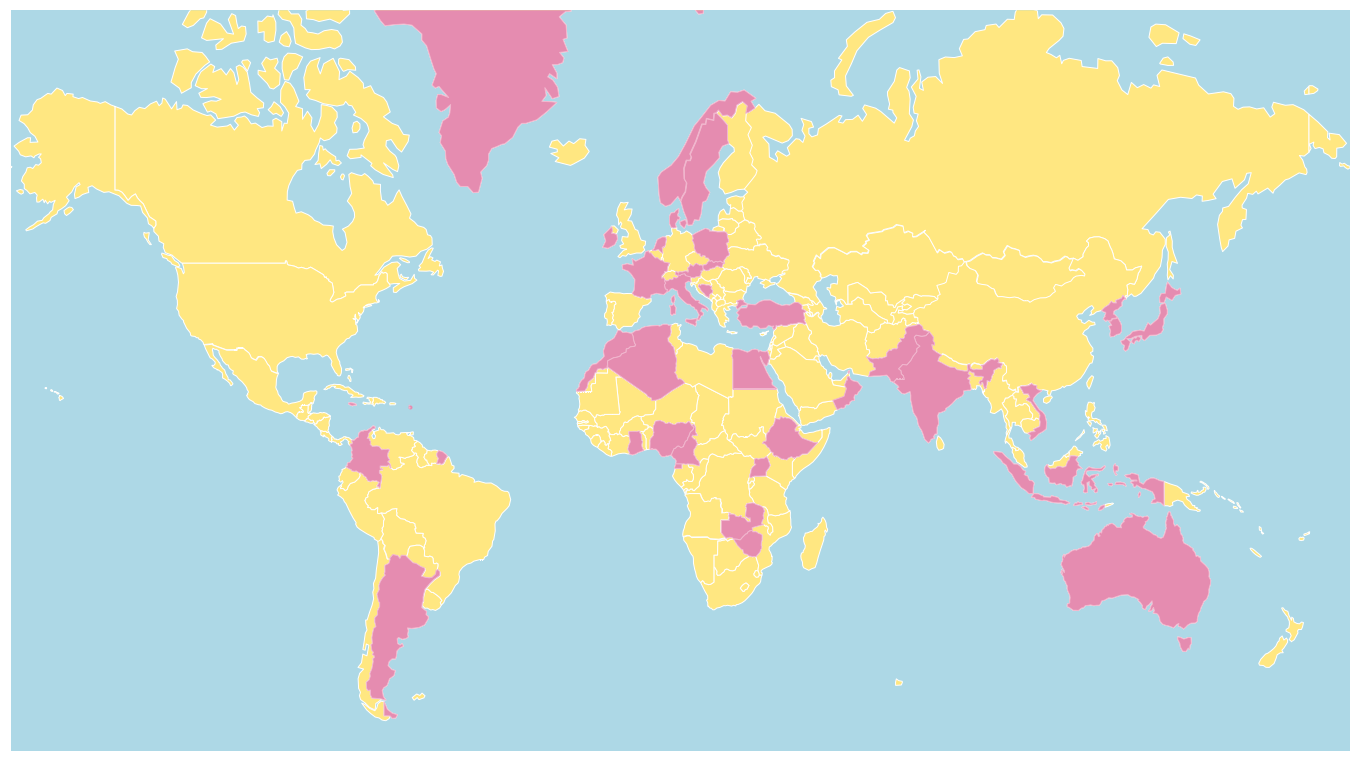

In [6]:
### Makes the Map ###

map_kwargs = {                                           # sets up projection and plot area, 
    'projection': gcrs.Mercator(central_longitude=11),   # buggy as hell, there is no logic as
    'extent':(-180, -60, 120, 77),                       # to why these numbers work but they do
}                                                        # so... uh... ¯\_(ツ)_/¯



ax = gplt.polyplot(basemap,
                   figsize=(24,24),
                   facecolor='#FFE781',           # color of the unread countries
                   edgecolor='white',             # border colors
                   linewidth=1,
                   zorder=1,
                   **map_kwargs,
                  )

read = gplt.polyplot(read_countries,
                     ax=ax,
                     facecolor='#E58CB0',          # color of the read countries
                     edgecolor='#F1B6CE',
                     zorder=10,
                     **map_kwargs,
                    )

read_small = gplt.pointplot(read_country_points,   # dots for countries too small to show up
                            ax=ax,
                            color='#E58CB0',
                            marker="o",
                            s=3,
                            zorder=5,
                            **map_kwargs
                           )


bg_color='lightblue'                           # colors in the "sea"
ax.patch.set_facecolor(bg_color)

savefig('../output/book_map-zimbabwe.png',              # filename
        bbox_inches = 'tight', 
        pad_inches = 0,
       facecolor=bg_color)

In [6]:
'Brazil' not in world.index

False

In [23]:
import json
with open('world.json', 'w') as wrld:
    json.dump(sorted(world.index), wrld, sort_keys=True, indent=4)

list